## This lab is focus on map projections and basic spatial data operation

Last week we talked about the maps as models, generalization, and scales of map. This week is about two other important concepts in map design, coordinate system and projection. The lab of this week is about read shapefiles in geopandas and create maps of different projections. 

### Recap:
- using anaconda to create virtual environment, `conda create -n geoviz python=3.8 numpy jupyter matplotlib geopandas fiona`
- remove a virtual environment, `conda remove --name geoviz --all`
- activate one virtual environment, `conda activate geoviz`
- using conda to install Python moduels, ```conda install geopandas```
- Python basics, `variable`, `data type`, `loop`, `flow control`, `list`, `function`, `matplotlib.pyplot`

### This week

- Read the traffic accidents map of Philadelphia using Python, `geopandas`
- Plot the number of traffic accidents in different years, months, and days, `groupby()`
- Plot maps of different projections, `cartopy`

### Homework
- plot the traffic accidents map of days, with title, using line color of red
- plot the location of Phily, Boston, LA, SF on a map of global projection


### Prepare the module
Install the Python module `cartopy`, by type in `conda install -c conda-forge cartopy` in the Anaconda Prompt. Make sure you acctivate your virtual environment first, `conda activate geoviz`

### 1. Read the shapefile of traffic accident in Philadelphia from 2007 to 2017
`Geopandas` is a very easy to use Python module to manipulate the shapefile as a csv spreadsheet. This part will give you a flavor of openning and manuipulating the attribute table of the shapefile using the `geopandas` module. This section will use the `geopandas` to read the shapefile of traffic accidents in Philadelphia and do basic analysis of the traffic accidents in different years, months, and days.

Read the shapefile

In [1]:
import geopandas as gpd

# geopandas will read the shapefile into a data frame with the geometric information
accident = gpd.read_file("data/crash_data_collision_crash_2007_2017.shp")


Let see what we have read

In [8]:
accident

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05770 40.06280)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96690 40.08220)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19460 39.97510)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21710 40.03570)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210 39.95110)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77457,None,77458,859429,2012004815,6,67,67301,2011,12,5,...,0,0,0,0,0,39.9849,-75.2368,None,None,POINT (-75.23680 39.98490)
77458,None,77459,859451,2011115410,6,67,67301,2011,10,6,...,0,0,0,8,0,40.0270,-75.0654,None,None,POINT (-75.06540 40.02700)
77459,None,77460,859453,2011118190,6,67,67301,2011,10,3,...,0,0,0,8,1,40.0021,-75.1678,None,None,POINT (-75.16780 40.00210)
77460,None,77461,859454,2011118469,6,67,67301,2011,10,5,...,1,0,0,8,0,40.0154,-75.0679,None,None,POINT (-75.06790 40.01540)


Let print the first five rows of the data frame

In [166]:
# print the first five rows of a data frame
accident.head(5)


,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05770 40.06280)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96690 40.08220)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19460 39.97510)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21710 40.03570)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210 39.95110)


print the columns of the dataframe

In [4]:
accident.columns

Index(['county_nam', 'objectid_1', 'objectid', 'crn', 'district', 'county',
       'municipali', 'crash_year', 'crash_mont', 'day_of_wee', 'time_of_da',
       'hour_of_da', 'illuminati', 'weather', 'road_condi', 'collision_',
       'relation_t', 'work_zone_', 'work_zon_1', 'work_zon_2', 'intersect_',
       'tcd_type', 'location_t', 'urban_rura', 'fatal_coun', 'injury_cou',
       'person_cou', 'total_unit', 'sch_bus_in', 'sch_zone_i', 'latitude',
       'longitude', 'arrival_tm', 'cons_zone_', 'dispatch_t', 'est_hrs_cl',
       'lane_close', 'ln_close_d', 'ntfy_hiwy_', 'spec_juris', 'tcd_func_c',
       'tfc_detour', 'workers_pr', 'wz_close_d', 'wz_flagger', 'wz_ln_clos',
       'wz_moving', 'wz_other', 'wz_shlder_', 'vehicle_co', 'automobile',
       'motorcycle', 'bus_count', 'small_truc', 'heavy_truc', 'suv_count',
       'van_count', 'bicycle_co', 'maj_inj_co', 'mod_inj_co', 'min_inj_co',
       'tot_inj_co', 'unk_inj_de', 'unk_inj_pe', 'driver_cou', 'driver_c_1',
       'driver

#### Examine the traffic accident statistics for each year, and each month

In [6]:
year_crash = accident.groupby('crash_year').size()
month_crash = accident.groupby('crash_mont').size()
print('The year crash is', year_crash)
print('The month crash is', month_crash)


The year crash is crash_year
2011     9941
2012    11281
2013    11072
2014    10565
2015    11453
2016    12137
2017    11013
dtype: int64
The month crash is crash_mont
1     5695
2     5444
3     6401
4     6763
5     7218
6     6829
7     6109
8     6645
9     6526
10    6931
11    6510
12    6391
dtype: int64


In Python, we can use the Python module of `matplotlib` to create grahics Plot the traffic accidents from 2011 to 2017, using the red color and `.` for each point and `-` to connect each point, using `markersize` to set the size of the point

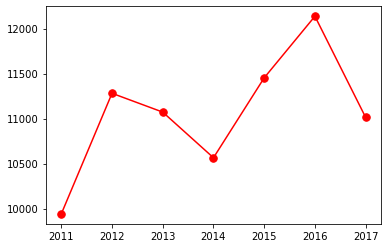

In [7]:
from matplotlib import pyplot as plt

# r mean read, . represent dote, - is to connect the point
plt.plot(year_crash, 'r.-', markersize=15)
plt.show()


### Plot the locations of the traffic accidents. Your first geovisualization in the class!

Before using the geopandas to do query, we need to know the datatype of different columns

In [169]:
accident['crash_year'].dtypes

dtype('int64')

Because the crash_year is integer, therefore, in order to plot the locations of traffic accident in 2015 we need to use `2015` rather than `"2015"`

Text(0.5, 1.0, 'Traffic accident in 2015')

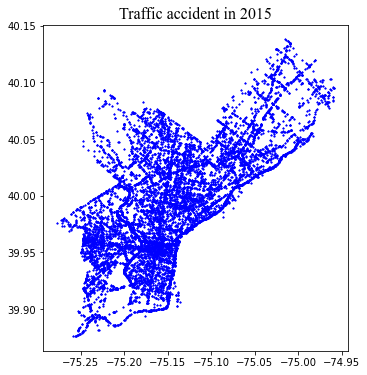

In [170]:
accident_2015 = accident.loc[accident['crash_year'] == 2015] #locate the traffic accident in 2015

# prepare the axis and coordinate
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the geopandas dataframe, we read from shapefile
accident_2015.plot(marker='*', ax=ax, color='blue', markersize=2)
ax.set_title('Traffic accident in 2015', fontsize='16', fontname='Times New Roman')


#### using multiple cretieria to filter out the accident, 

Text(0.5, 1.0, 'Traffic accident in 2011 on Monday')

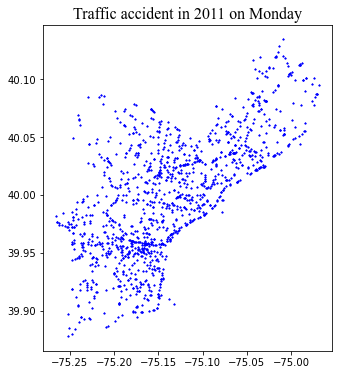

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# check the accident in 2011 and second day of one week,
accident_yr = accident.loc[(accident['crash_year'] == 2011) & (accident['day_of_wee'] == 2)]
accident_yr.plot(marker='*', ax=ax, color='blue', markersize=2)
ax.set_title('Traffic accident in 2011 on Monday', fontsize='16', fontname='Times New Roman')


Text(0.5, 1.0, 'Traffic accident in September of 2012')

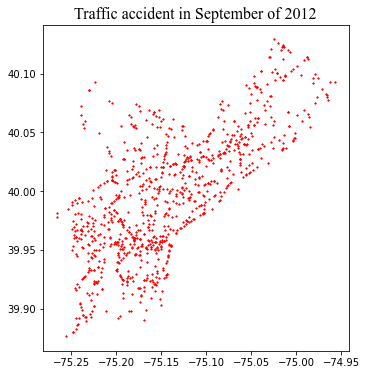

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# accident of 2012 and September
accident_yr = accident.loc[(accident['crash_year'] == 2012) & ((accident['crash_mont'] == 9))]
accident_yr.plot(marker='*', ax=ax, color='red', markersize=2)
ax.set_title('Traffic accident in September of 2012', fontsize='16', fontname='Times New Roman')


#### We can create multiple subplot and create the traffic accident in different years


Text(0.5, 1.0, 'Traffic accident in 2014')

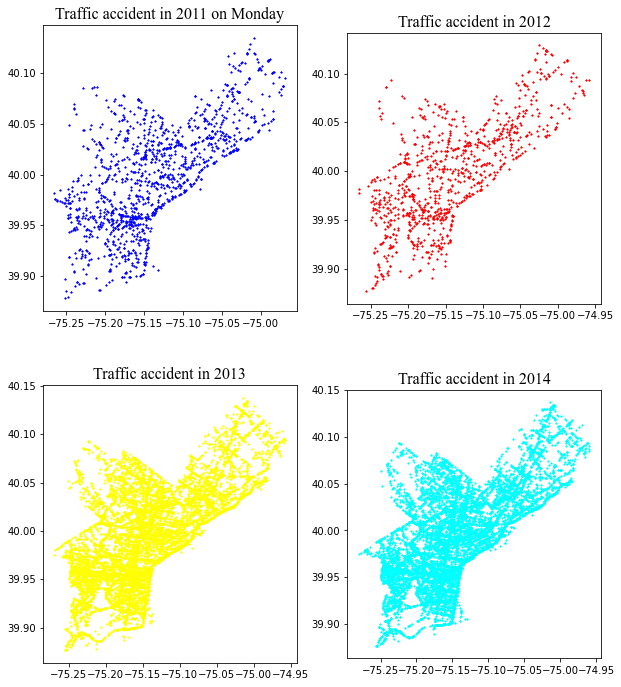

In [176]:
fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# check the accident in 2011 and second day of one week,
accident_yr = accident.loc[(accident['crash_year'] == 2011) & (accident['day_of_wee'] == 2)]
accident_yr.plot(marker='*', ax=ax[0][0], color='blue', markersize=2)
ax[0][0].set_title('Traffic accident in 2011 on Monday', fontsize='16', fontname='Times New Roman')

# accident of 2012 and September
accident_yr = accident.loc[(accident['crash_year'] == 2012) & ((accident['crash_mont'] == 9))]
accident_yr.plot(marker='*', ax=ax[0][1], color='red', markersize=2)
ax[0][1].set_title('Traffic accident in 2012', fontsize='16', fontname='Times New Roman')


# accident of 2013
accident_yr = accident.loc[accident['crash_year'] == 2013]
accident_yr.plot(marker='*', ax=ax[1][0], color='yellow', markersize=2)
ax[1][0].set_title('Traffic accident in 2013', fontsize='16', fontname='Times New Roman')

# accident of 2014
accident_yr = accident.loc[accident['crash_year'] == 2014]
accident_yr.plot(marker='*', ax=ax[1][1], color='cyan', markersize=2)
ax[1][1].set_title('Traffic accident in 2014', fontsize='16', fontname='Times New Roman')


Export the map into graphics

In [19]:
fig.savefig('foo.png', dpi=300)


### 2. Map Projections 
Plot the globe using different projection - Using cartopy. You can also use `Basemap`, however, `Basemap` will not be supported in future, therefore, we focus on the active module `cartopy`. In future, you can even develop your own modules based on `Matplotlib`. Actually, many open sourced modules were developed based on a teaching project or even final project.   

Plot the global map of Sinusoidal projection

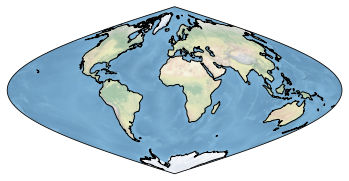

In [184]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# ax = plt.axes(projection=ccrs.epsg(2275)) # for epsg https://spatialreference.org/ref/epsg/?search=Penn&srtext=Search
ax = plt.axes(projection=ccrs.Sinusoidal()) #Mercator # for other projections: https://scitools.org.uk/cartopy/docs/v0.15/cartopy_outline.html
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')

ax.stock_img()
plt.show()


#### Plot lines on different projection
We can plot the lines that connect different places in different projections. Here we will see the lines between New York City and Singapore in Geodetic and PlateCarree. 

We need to install the Python module `cartopy` to do the rest.

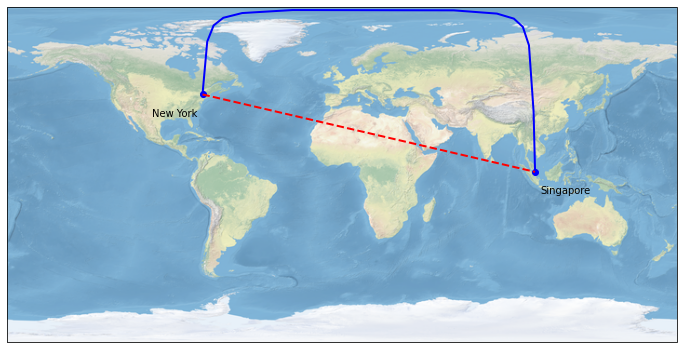

In [185]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
sg_lon, sg_lat = 103.799321, 1.365707

plt.plot([ny_lon, sg_lon], [ny_lat, sg_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, sg_lon], [ny_lat, sg_lat],
         color='red', linewidth=2, linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(sg_lon + 3, sg_lat - 12, 'Singapore',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()


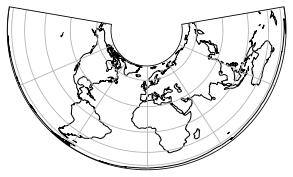

In [186]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(5.1299, 3))
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.coastlines(resolution='110m')
ax.gridlines()

#### Tissot example of different projections

PlateCarree projection

/Users/xiaojiang/anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fb1ff3bf710> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


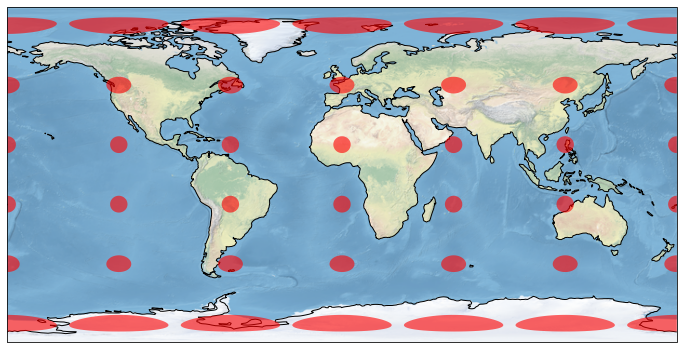

In [100]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree()) # for other projections: https://scitools.org.uk/cartopy/docs/v0.15/cartopy_outline.html

# make the map global rather than have it zoom in to the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='red', alpha=0.6)
plt.show()


Mercator projection

/Users/xiaojiang/anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fb1f1e791d0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


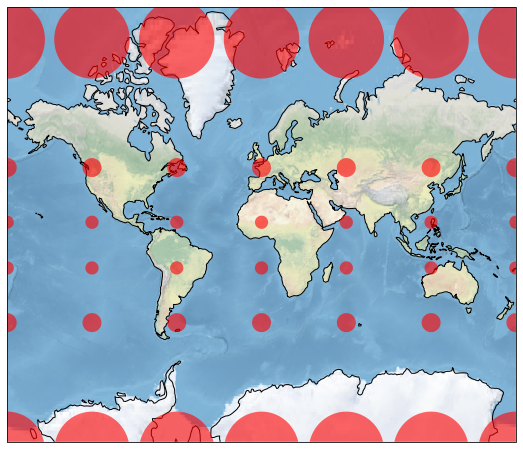

In [92]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Mercator()) # for other projections: https://scitools.org.uk/cartopy/docs/v0.15/cartopy_outline.html

# make the map global rather than have it zoom in to the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='red', alpha=0.6)
plt.show()


## Plot regional maps with different projections
Rather than forcus on the global map, let focus on any specific region by setting the extent of the map under different projections

#### Map of Africa, set_extent([lon_lower, lon_upper, lat_lower, lat_upper])

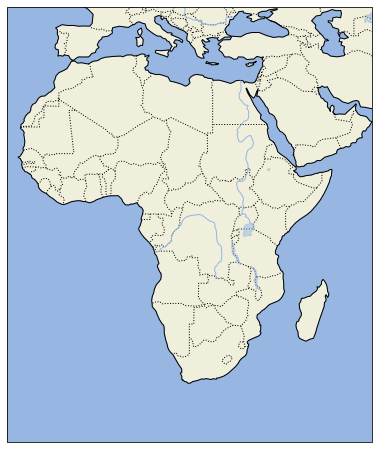

In [187]:
import cartopy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# [lon_lower, lon_upper, lat_lower, lat_upper]
ax.set_extent([-20, 60, -40, 40])

plt.show()

#### Map of America, set_extent([lon_lower, lon_upper, lat_lower, lat_upper])

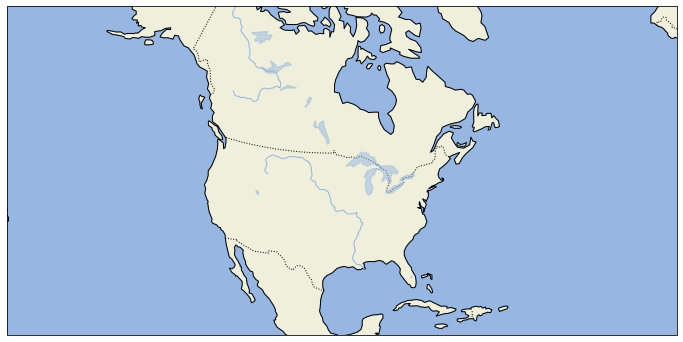

In [188]:
import cartopy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=cartopy.crs.LambertConformal())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# [lon_lower, lon_upper, lat_lower, lat_upper]
ax.set_extent([-148.544271, -39.045398, 10.515164, 60.016220])

plt.show()


#### Let's have Philadelphia marked on the map
You can find the projections from here, https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#albersequalarea

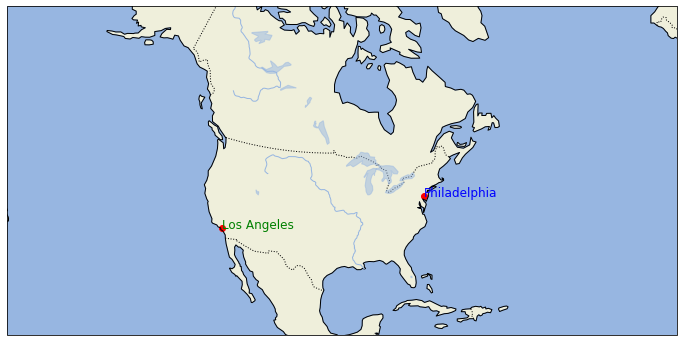

In [189]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.LambertConformal())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# [lon_lower, lon_upper, lat_lower, lat_upper] of America
ax.set_extent([-148.544271, -39.045398, 10.515164, 60.016220])

lon_phily = -75.157227
lat_phily = 39.980076
lon_LA = -118.321113
lat_LA = 34.083629

plt.scatter([lon_phily, lon_LA], [lat_phily, lat_LA], transform=ccrs.PlateCarree(), color='red')
plt.text(lon_phily, lat_phily, 'Philadelphia', 
         fontsize=12, 
         horizontalalignment='left',
         color='Blue',
         transform=ccrs.Geodetic())

plt.text(lon_LA, lat_LA, 'Los Angeles', 
         fontsize=12, 
         horizontalalignment='left',
         color='Green',
         transform=ccrs.Geodetic())

plt.show()


## Homework: 
- plot the traffic accidents map of Mondays of August 2014, with title, using line color of red

- Plot city of Los Angeles, Philadelphia, Seattle and Miami to the map, (Hint: Check the coordinates from Google Maps). Make sure to use `LambertConformal` projection. 
- Put the city name of each city on the map and use different colors for different cities.

- Plot the route from Seattle to Miami on the Map using geodic 